In [1]:
import pandas as pd #the csv reading library
import matplotlib as mpl
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

In [2]:
df_meta = pd.read_csv('../../../Data_Thesis/meta_data.csv', sep=',', index_col=0)

#fix date time 
df_meta['date_time'] = pd.to_datetime(df_meta['Date'])
df_meta['Date'] = df_meta['date_time'].dt.date

df_meta

Date     Trip Station  Lat  Lon  Water_depth Sample_depth  \
Sample                                                                    
214371  2021-10-25  GOM21FA   St.5B  NaN  NaN          NaN          NaN   
214671  2021-10-27  GOM21FA   St.MK  NaN  NaN          NaN            2   
214672  2021-10-27  GOM21FA   St.MK  NaN  NaN          NaN            4   
214673  2021-10-27  GOM21FA   St.MK  NaN  NaN          NaN            6   
214674  2021-10-27  GOM21FA   St.MK  NaN  NaN          NaN            8   
...            ...      ...     ...  ...  ...          ...          ...   
225354  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    
225355  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    
225356  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    
225357  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    
225358  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    

       Sample_depth_units  Wavguide_Path_lengths    BC_time  \
Sample                                                        
214371                 CM                  0.010        NaN   
214671                 CM                  0.010        NaN   
214672                 CM                  0.010        NaN   
214673                 CM                  0.010        NaN   
214674                 CM                  0.010        NaN   
...                   ...                    ...        ...   
225354                  M                  0.489  10.166667   
225355                  M                  0.489  10.933333   
225356                  M                  0.489  11.700000   
225357                  M                  0.489  12.466667   
225358                  M                  0.489  13.233333   

        BC_Chamber_vol_(L)     Type Waveguide_used Notes Flagged   Salinity  \
Sample                                                                        
214371                 NaN      RHZ        1CM CUV   NaN     NaN  31.846576   
214671                 NaN      RHZ        1CM CUV   NaN     NaN  31.447235   
214672                 NaN      RHZ        1CM CUV   NaN     NaN  31.447235   
214673                 NaN      RHZ        1CM CUV   NaN     NaN  31.447235   
214674                 NaN      RHZ        1CM CUV   NaN     NaN  31.447235   
...                    ...      ...            ...   ...     ...        ...   
225354            0.053721  LANDSYR  LWCC 50 CM #2  BC14     NaN  36.007597   
225355            0.053721  LANDSYR  LWCC 50 CM #2  BC15     NaN  36.007597   
225356            0.053721  LANDSYR  LWCC 50 CM #2  BC16     NaN  36.007597   
225357            0.053721  LANDSYR  LWCC 50 CM #2  BC17     NaN  36.007597   
225358            0.053721  LANDSYR  LWCC 50 CM #2  BC18     NaN  36.007597   

        date_time  
Sample             
214371 2021-10-25  
214671 2021-10-27  
214672 2021-10-27  
214673 2021-10-27  
214674 2021-10-27  
...           ...  
225354 2022-07-24  
225355 2022-07-24  
225356 2022-07-24  
225357 2022-07-24  
225358 2022-07-24  

[2515 rows x 17 columns]

In [3]:
df_iron = pd.read_csv('../../../Data_Thesis/Iron/Iron.csv', sep=',', index_col=0)

#make all the spots labeled NA a nan value
df_iron = df_iron.replace('NA', np.nan)
df_iron = df_iron.replace('NA ', np.nan)

#make all BDL a 0 
df_iron.loc[df_iron['FeT_uM'] == 'BLD', 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] == 'BLD', 'Fe2_uM'] = 0

# convert columns to numeric data type
df_iron['FeT_uM'] = pd.to_numeric(df_iron['FeT_uM'], errors='coerce')
df_iron['Fe2_uM'] = pd.to_numeric(df_iron['Fe2_uM'], errors='coerce')

df_iron['FeT_uM'] = df_iron['FeT_uM'].where(pd.notna(df_iron['FeT_uM']), other=np.nan)
df_iron['Fe2_uM'] = df_iron['Fe2_uM'].where(pd.notna(df_iron['Fe2_uM']), other=np.nan)

#make all negative a 0 
df_iron.loc[df_iron['FeT_uM'] < 0, 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] < 0, 'Fe2_uM'] = 0

#calculate Fe +3 
df_iron['Fe3_uM'] = df_iron['FeT_uM'] - df_iron['Fe2_uM']
df_iron.loc[df_iron['Fe3_uM'] < 0, 'Fe3_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] > df_iron['FeT_uM'], 'Fe3_uM'] = 0
df_iron['Fe3_uM'] = pd.to_numeric(df_iron['Fe3_uM'], errors='coerce')
df_iron['Fe3_uM'] = df_iron['Fe3_uM'].where(pd.notna(df_iron['Fe3_uM']), other=np.nan)

df_iron = df_iron.drop(['Treatment', 'Campaign', 'Location', 'Type', 'FeT_Date','FeT_mgL', 'FeT_Notes', 'FeT_Depth', 'FeT_Time', 'Fe2_Date','Fe2_mgL', 'Fe2_Notes', 'Fe2_Depth', 'Fe2_Time'], axis = 1)

df_iron

FeT_uM    Fe2_uM  Fe3_uM
Sample_ID                                 
211911          3.055000  0.909000   2.146
211912          0.948000  0.638000   0.310
211913         26.176000  3.820000  22.356
211914         30.136000  2.641000  27.495
211915         15.335000  1.118000  14.217
...                  ...       ...     ...
225385          9.751000  3.130000   6.621
225386          7.977000       NaN     NaN
225388          9.798000  3.660000   6.138
221519+20      20.258625       NaN     NaN
221519+221520        NaN  2.286245     NaN

[1916 rows x 3 columns]

In [4]:
files = glob.glob('../../../Data_Thesis/CDOM/Spectra/sprectra_pchip_baseline_corrected_BC*.csv')
path_save = '../../../Data_Thesis/CDOM/sprectra_pchip_baseline_corrected_BC.csv'

def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=0, ignore_index=False)

df.to_csv(path_save)

wavelengths = list(range(250, 751))
df = df.drop('file_id', axis = 1)
df = df.drop(224946)
df = df.drop(225250)
df.columns = ['a' + col for col in df.columns]

df

a250       a251       a252       a253       a254       a255  \
Sample_ID                                                                     
212841     15.562165  12.627484  10.097944   7.930620   6.220141   4.827248   
212842     30.002659  25.868276  21.558296  17.581485  14.099838  11.172776   
212843     29.252661  24.941152  20.725263  16.737468  13.345520  10.442484   
212844     28.609422  24.398449  20.251881  16.342578  13.053546  10.233358   
212845     28.697131  24.597949  20.364521  16.467214  13.142749  10.331789   
...              ...        ...        ...        ...        ...        ...   
225357      3.477217   3.421218   3.352890   3.291963   3.220108   3.170434   
225357      3.532104   3.426633   3.351500   3.290701   3.230037   3.173450   
225358      5.171548   4.892104   4.610387   4.324504   4.118212   3.898919   
225358      5.116499   4.927387   4.599630   4.331877   4.116927   3.907237   
225358      5.257854   4.887211   4.593830   4.329663   4.083044   3.895790   

               a256      a257      a258      a259  ...      a741      a742  \
Sample_ID                                          ...                       
212841     3.762017  2.950543  2.210258  1.667827  ... -0.035556 -0.052835   
212842     8.744718  6.850579  5.297931  4.155212  ... -0.045871 -0.071246   
212843     8.126203  6.268685  4.779141  3.705906  ... -0.044484 -0.067739   
212844     7.956465  6.170869  4.738974  3.704393  ... -0.051573 -0.072410   
212845     8.035800  6.272179  4.836006  3.797104  ... -0.048144 -0.068391   
...             ...       ...       ...       ...  ...       ...       ...   
225357     3.113463  3.059244  3.029957  2.966596  ... -0.004894 -0.002247   
225357     3.118391  3.055782  3.027401  2.974486  ... -0.006229  0.001470   
225358     3.717492  3.567526  3.452144  3.335508  ... -0.000536  0.003183   
225358     3.720468  3.573757  3.463865  3.349515  ... -0.004074  0.006893   
225358     3.714361  3.572414  3.455187  3.323325  ...  0.002676  0.004631   

               a743      a744      a745      a746      a747      a748  \
Sample_ID                                                               
212841    -0.080095 -0.032155  0.022789  0.054293  0.036149 -0.026851   
212842    -0.074929 -0.025571  0.056399  0.062123  0.019958 -0.050580   
212843    -0.072709 -0.035469  0.037236  0.048136  0.014917 -0.048439   
212844    -0.085202 -0.054279  0.033166  0.067990  0.007113 -0.040314   
212845    -0.079525 -0.047575  0.032771  0.059373  0.035011 -0.022308   
...             ...       ...       ...       ...       ...       ...   
225357    -0.000740  0.002582 -0.005794 -0.001392 -0.001160  0.000722   
225357     0.000069  0.000501 -0.002786 -0.006906 -0.001338  0.001011   
225358     0.003670  0.004888  0.000601  0.007479  0.004207  0.002221   
225358     0.000906  0.001825 -0.001382  0.001338  0.009083 -0.000683   
225358     0.002465  0.002334  0.005511  0.001984  0.007202  0.000418   

               a749      a750  
Sample_ID                      
212841    -0.055058 -0.159034  
212842    -0.044673 -0.078425  
212843    -0.073041 -0.098425  
212844    -0.073838 -0.057697  
212845    -0.073909 -0.142550  
...             ...       ...  
225357    -0.001562  0.000847  
225357     0.002039  0.018144  
225358     0.006726  0.013226  
225358     0.008131  0.007064  
225358     0.003267  0.003897  

[1841 rows x 501 columns]

In [5]:
trips = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
stations = ['St.5B','St.4','St.MK','St.7','St.16','St.2','St.9','St.14','St.15','St.13','St.11','St.12']

df_cdom = df.join(df_meta)
df_cdom

a250       a251       a252      a253      a254      a255  \
211937  12.309252  10.357067   8.787713  7.491982  6.430447  5.546578   
211937  15.259474  13.048613  11.156788  9.549894  8.273305  7.175086   
211937  12.309252  10.357067   8.787713  7.491982  6.430447  5.546578   
211937  15.259474  13.048613  11.156788  9.549894  8.273305  7.175086   
211938  12.354495  10.327055   8.766885  7.454766  6.387681  5.526585   
...           ...        ...        ...       ...       ...       ...   
225358   5.128316   4.938816   4.610388  4.342086  4.126696  3.916576   
225358   5.269960   4.898558   4.604576  4.339868  4.092743  3.905105   
225358   5.171548   4.892104   4.610387  4.324504  4.118212  3.898919   
225358   5.116499   4.927387   4.599630  4.331877  4.116927  3.907237   
225358   5.257854   4.887211   4.593830  4.329663  4.083044  3.895790   

            a256      a257      a258      a259  ...  Sample_depth_units  \
211937  4.896499  4.300621  3.807397  3.406602  ...                   M   
211937  6.295314  5.626407  5.047773  4.621939  ...                   M   
211937  4.896499  4.300621  3.807397  3.406602  ...                   M   
211937  6.295314  5.626407  5.047773  4.621939  ...                   M   
211938  4.860042  4.272095  3.806505  3.410771  ...                   M   
...          ...       ...       ...       ...  ...                 ...   
225358  3.729425  3.582413  3.472296  3.357711  ...                   M   
225358  3.723305  3.581067  3.463600  3.331468  ...                   M   
225358  3.717492  3.567526  3.452144  3.335508  ...                   M   
225358  3.720468  3.573757  3.463865  3.349515  ...                   M   
225358  3.714361  3.572414  3.455187  3.323325  ...                   M   

        Wavguide_Path_lengths    BC_time  BC_Chamber_vol_(L)     Type  \
211937                    NaN   0.200000            0.056902  LANDSYR   
211937                    NaN   0.200000            0.056902  LANDSYR   
211937                    NaN   0.200000            0.056902  LANDSYR   
211937                    NaN   0.200000            0.056902  LANDSYR   
211938                    NaN   1.200000            0.056902  LANDSYR   
...                       ...        ...                 ...      ...   
225358                  0.489  13.233333            0.053721  LANDSYR   
225358                  0.489  13.233333            0.053721  LANDSYR   
225358                  0.489  13.233333            0.053721  LANDSYR   
225358                  0.489  13.233333            0.053721  LANDSYR   
225358                  0.489  13.233333            0.053721  LANDSYR   

        Waveguide_used  Notes  Flagged   Salinity  date_time  
211937             NaN    BC1      NaN  35.223851 2021-07-16  
211937             NaN    BC1      NaN  35.223851 2021-07-16  
211937             NaN    BC1      NaN  35.223851 2021-07-16  
211937             NaN    BC1      NaN  35.223851 2021-07-16  
211938             NaN    BC2      NaN  35.223851 2021-07-16  
...                ...    ...      ...        ...        ...  
225358   LWCC 50 CM #2   BC18      NaN  36.007597 2022-07-24  
225358   LWCC 50 CM #2   BC18      NaN  36.007597 2022-07-24  
225358   LWCC 50 CM #2   BC18      NaN  36.007597 2022-07-24  
225358   LWCC 50 CM #2   BC18      NaN  36.007597 2022-07-24  
225358   LWCC 50 CM #2   BC18      NaN  36.007597 2022-07-24  

[1841 rows x 518 columns]

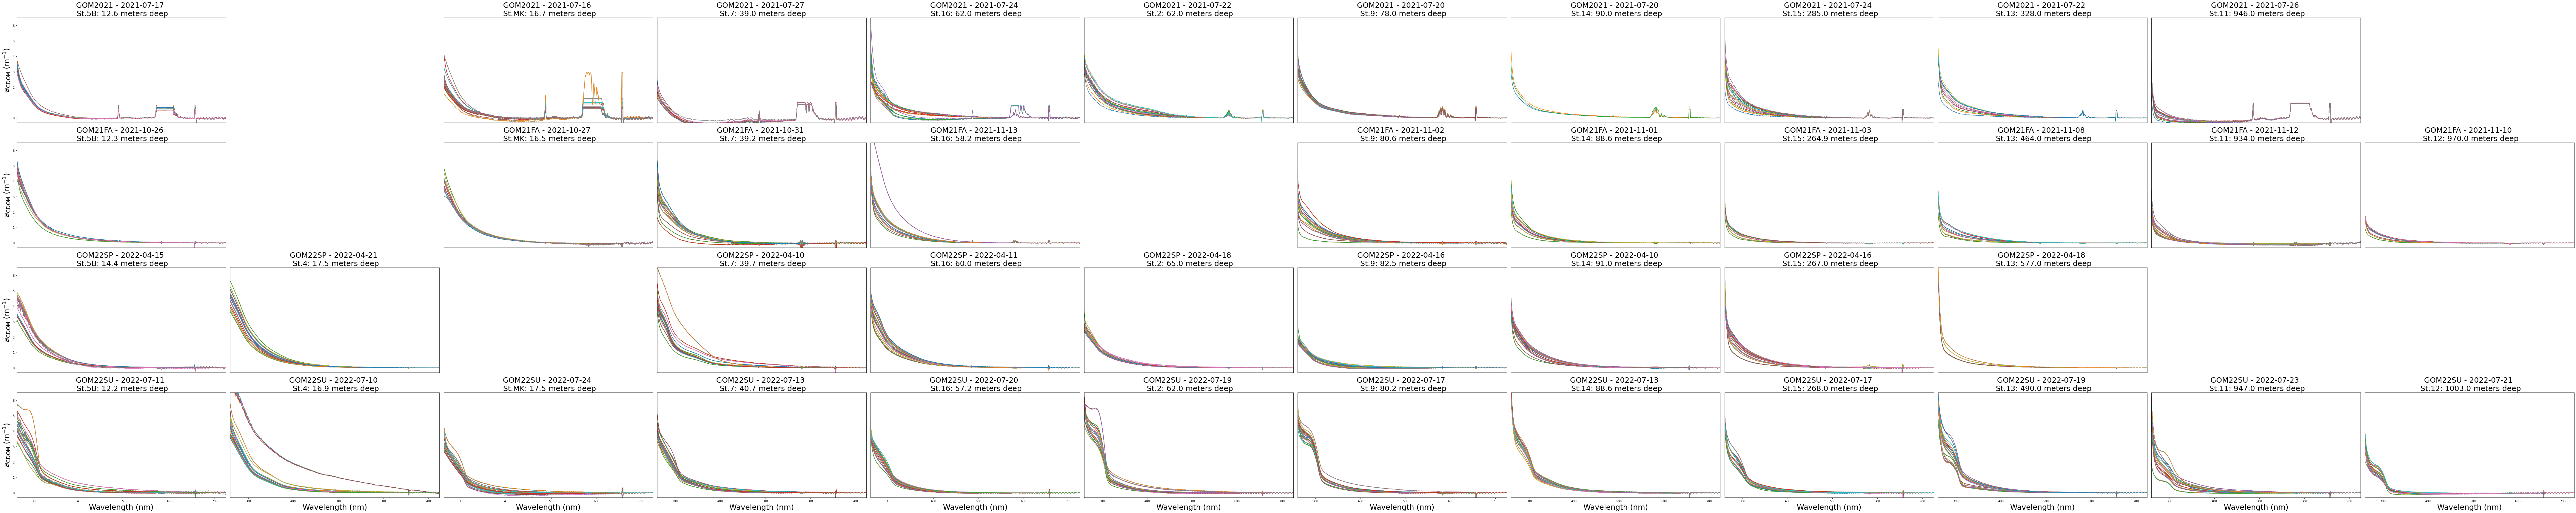

In [6]:
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*10, len(trips)*6))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        subset_df = df_cdom[(df_cdom['Trip'] == trip) & (df_cdom['Station'] == station)]
        
        plotted = False  # Flag to check if something has been plotted

        # If any data exists for this combination
        if not subset_df.empty:
            for idx, row in subset_df.iterrows():
                cdom_abs = row[:501]  # Limit to the first 501 values
                cdom_abs = np.asarray(cdom_abs, dtype=float).ravel()
                wavelengths = np.asarray(wavelengths, dtype=float).ravel()
                date = row["Date"] 
                # Plot all rows in subset_df against wavelengths
                axes[i, j].plot(wavelengths, cdom_abs)  # use cdom_abs.values[0] to get the values of the row
                plotted = True
            axes[i,j].set_ylim(-.3,6.5)
            axes[i,j].set_xlim(260,725)
            water_depth = df_meta[(df_meta['Trip'] == trip) & (df_meta['Station'] == station)]
            water_depth = water_depth['Water_depth'].mean()
            water_depth = round(water_depth, 1)
            axes[i, j].set_title(f'{trip} - {date} \n {station}: {water_depth} meters deep', size =25)
        else: 
            axes[i, j].axis('off')  # Turn off the axis if no data for that combination

            
        if j == 0:
            axes[i,j].set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size=25, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            axes[i,j].set_ylabel('')
            axes[i,j].yaxis.set_ticklabels([])
            axes[i,j].set_yticks([])
        
        if i == 3:
            axes[i,j].set_xlabel('Wavelength (nm)', size=25, c='black')
            axes[i,j].xaxis.set_tick_params(labelsize=10)
        else: 
            axes[i,j].set_xlabel('')
            axes[i,j].xaxis.set_ticklabels([])
            axes[i,j].set_xticks([])

plt.tight_layout()
fig.set_facecolor('w')
plt.show()


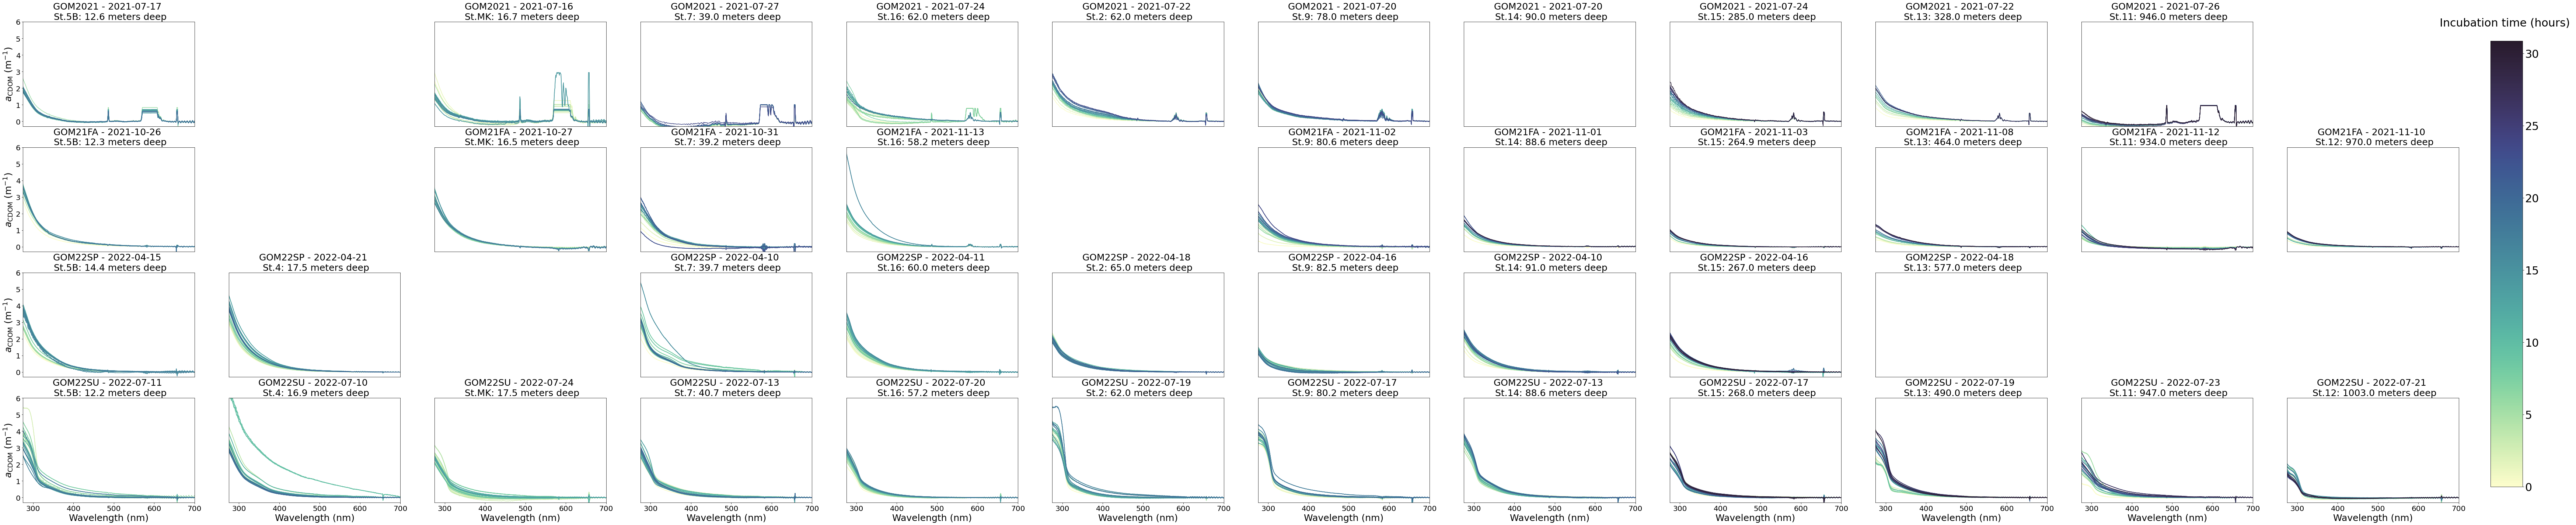

In [7]:
#Setup colormap and normalization:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*10, len(trips)*6))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        subset_df = df_cdom[(df_cdom['Trip'] == trip) & (df_cdom['Station'] == station)]
        plotted = False

        if not subset_df.empty:
            for idx, row in subset_df.iterrows():
                #get the data
                cdom_abs = row[:501]
                cdom_abs = np.asarray(cdom_abs, dtype=float).ravel()
                
                #get the date
                date = row["Date"]

                #color and plot:
                cmap=cmo.deep
                norm = plt.Normalize(vmin=0, vmax=df_cdom['BC_time'].max())
                color = cmap(norm(row["BC_time"]))
                axes[i, j].plot(wavelengths, cdom_abs, color=color)
                
                plotted = True
            
            #set axis and lables 
            axes[i,j].set_ylim(-.3,6)
            axes[i,j].set_xlim(275,700)
            water_depth = df_meta[(df_meta['Trip'] == trip) & (df_meta['Station'] == station)]
            water_depth = water_depth['Water_depth'].mean()
            water_depth = round(water_depth, 1)
            axes[i, j].set_title(f'{trip} - {date} \n {station}: {water_depth} meters deep', size=25)
        else: 
            axes[i, j].axis('off')

        #set y labes 
        if j == 0:
            axes[i,j].set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size=25, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=20)
        else: 
            axes[i,j].set_ylabel('')
            axes[i,j].yaxis.set_ticklabels([])
            axes[i,j].set_yticks([])
        
        #set x labes 
        if i == 3:
            axes[i,j].set_xlabel('Wavelength (nm)', size=25, c='black')
            axes[i,j].xaxis.set_tick_params(labelsize=20)
        else: 
            axes[i,j].set_xlabel('')
            axes[i,j].xaxis.set_ticklabels([])
            axes[i,j].set_xticks([])

#Add colorbar:
fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=0, vmax=df_cdom['BC_time'].max())), cax=cbar_ax)
cbar.ax.set_title(f'Incubation time (hours) \n', fontsize = 30)
cbar.ax.tick_params(labelsize=30)

#disply and save 
#plt.tight_layout()
fig.set_facecolor('w')
plt.savefig("../../../Data_Thesis/FIGS/Benthic_Chamber_spectra.png")

plt.show()

Text(0.5, 1.0, 'BC fe3')

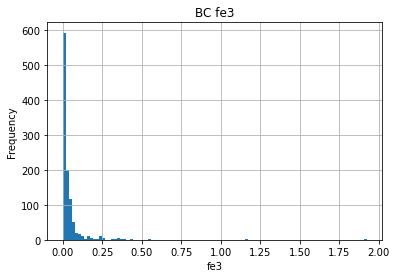

In [8]:
#add fe data 
df_iron = df_iron[df_iron.index.to_series().apply(lambda x: str(x).isnumeric())]
df_iron.index = df_iron.index.astype('int64')
df_cdom = df_cdom.join(df_iron)

#plot a histogram of the 'fe3' column
df_cdom['Fe3_uM'].hist(bins = 100)
plt.xlabel('fe3')
plt.ylabel('Frequency')
plt.title('BC fe3')

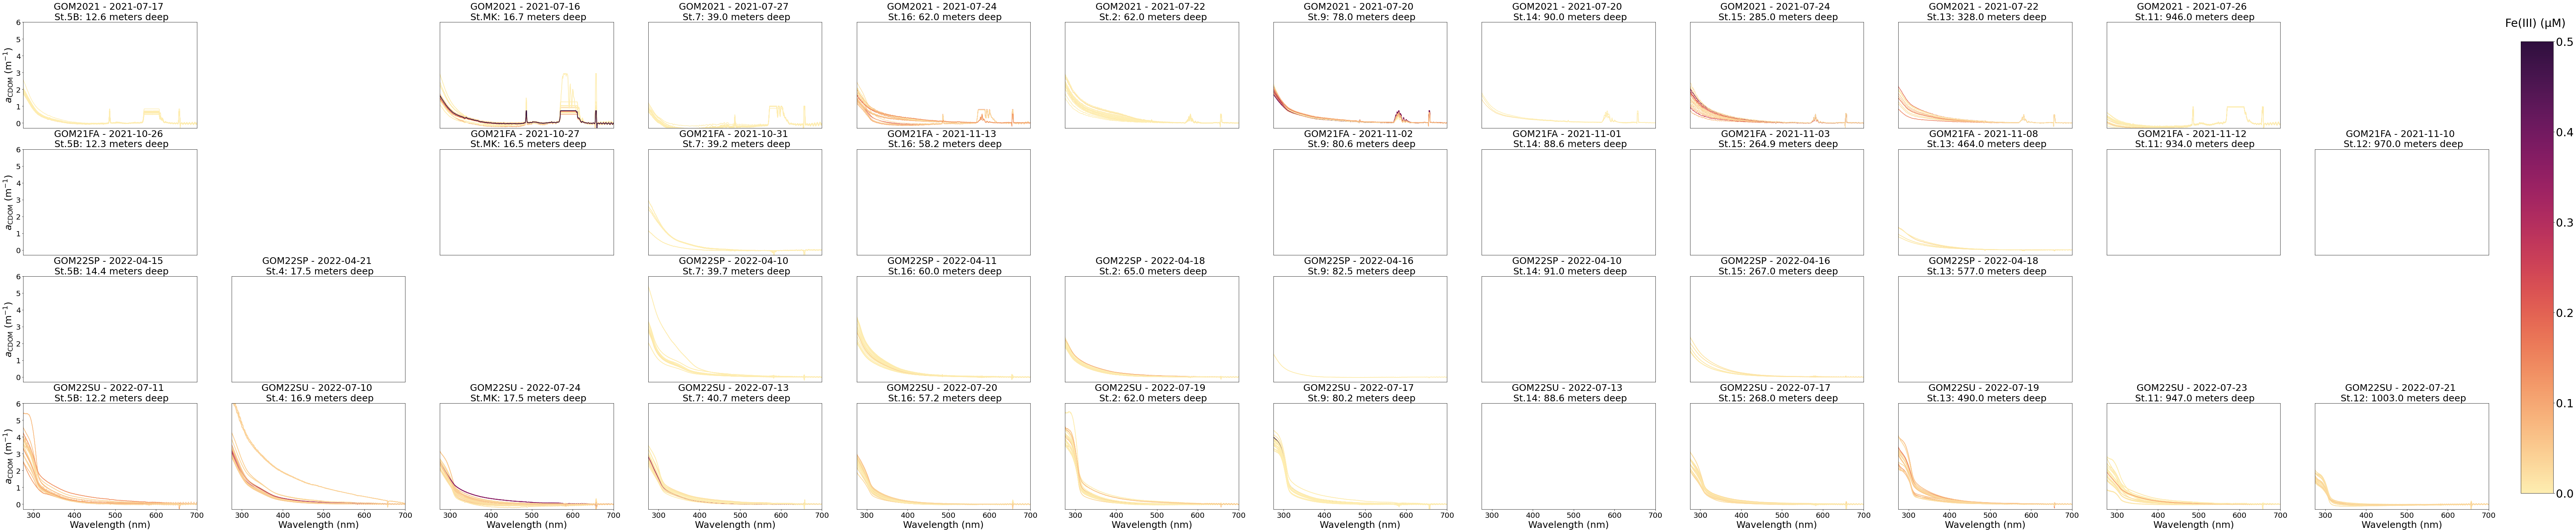

In [9]:
#Setup colormap and normalization:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*10, len(trips)*6))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        subset_df = df_cdom[(df_cdom['Trip'] == trip) & (df_cdom['Station'] == station)]
        plotted = False

        if not subset_df.empty:
            for idx, row in subset_df.iterrows():
                #get the data
                cdom_abs = row[:501]
                cdom_abs = np.asarray(cdom_abs, dtype=float).ravel()
                
                #get the date
                date = row["Date"]

                #color and plot:
                cmap=cmo.matter
                norm = plt.Normalize(vmin=0, vmax=.5)
                color = cmap(norm(row["Fe3_uM"]))
                axes[i, j].plot(wavelengths, cdom_abs, color=color)
                
                plotted = True
            
            #set axis and lables 
            axes[i,j].set_ylim(-.3,6)
            axes[i,j].set_xlim(275,700)
            water_depth = df_meta[(df_meta['Trip'] == trip) & (df_meta['Station'] == station)]
            water_depth = water_depth['Water_depth'].mean()
            water_depth = round(water_depth, 1)
            axes[i, j].set_title(f'{trip} - {date} \n {station}: {water_depth} meters deep', size=25)
        else: 
            axes[i, j].axis('off')

        #set y labes 
        if j == 0:
            axes[i,j].set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size=25, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=20)
        else: 
            axes[i,j].set_ylabel('')
            axes[i,j].yaxis.set_ticklabels([])
            axes[i,j].set_yticks([])
        
        #set x labes 
        if i == 3:
            axes[i,j].set_xlabel('Wavelength (nm)', size=25, c='black')
            axes[i,j].xaxis.set_tick_params(labelsize=20)
        else: 
            axes[i,j].set_xlabel('')
            axes[i,j].xaxis.set_ticklabels([])
            axes[i,j].set_xticks([])

#Add colorbar:
fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=0, vmax=.5)), cax=cbar_ax)
cbar.ax.set_title(f'Fe(III) (\u03BCM) \n', fontsize = 30)
cbar.ax.tick_params(labelsize=30)

#disply and save 
#plt.tight_layout()
fig.set_facecolor('w')
#plt.savefig("../../../Data_Thesis/FIGS/Benthic_Chamber_spectra.png")

plt.show()